In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor, XGBClassifier

In [315]:
athlete = pd.read_csv(r"C:\Users\heath\Downloads\athletes.csv")
non_athlete = pd.read_csv(r"C:\Users\heath\Downloads\non_athletes.csv")
professor = pd.read_csv(r"C:\Users\heath\Downloads\professors_with_subject.csv")
staff = pd.read_csv(r"C:\Users\heath\Downloads\staff.csv")

In [317]:
athlete

,Name,Gender,Sport,Major,Practice_Hours,Study_Hours,Study_Location,Study_Method,Athlete_Negatively_Effects_Academics,GPA
0,A001,Male,Baseball,Biology,11,9,Library,Online Tools,No,3.36
1,A002,Female,Football,Business,9,10,Dorm,Online Tools,No,3.22
2,A003,Female,Volleyball,Nursing,17,11,Library,Alone,No,3.24
3,A004,Male,Volleyball,Math,13,8,Library,Group,Yes,2.91
4,A005,Female,Football,Education,15,15,Library,Group,Yes,3.67
...,...,...,...,...,...,...,...,...,...,...
95,A096,Male,Baseball,Comp Sci,8,9,Coffee Shop,Online Tools,No,3.84
96,A097,Male,Tennis,Education,21,14,Library,Group,No,3.77
97,A098,Male,Basketball,Psych,14,14,Academic Center,Online Tools,No,2.90
98,A099,Male,Wrestling,Business,13,11,Academic Center,Alone,No,3.62


In [319]:
non_athlete

,Name,Gender,Major,Study_Hours,Study_Location,Study_Method,NonAthlete_Negatively_Impacts,GPA
0,N001,Male,Biology,13,Dorm,Group,No,3.48
1,N002,Male,Business,18,Dorm,Online Tools,No,3.58
2,N003,Female,Business,12,Library,Group,No,3.37
3,N004,Male,Nursing,13,Academic Center,Group,No,3.51
4,N005,Male,Nursing,17,Dorm,Group,No,3.97
...,...,...,...,...,...,...,...,...
95,N096,Male,Math,18,Dorm,Group,Yes,3.95
96,N097,Female,Comp Sci,10,Library,Group,Yes,3.27
97,N098,Female,Comp Sci,11,Coffee Shop,Alone,No,2.82
98,N099,Female,Psych,9,Coffee Shop,Alone,No,2.91


In [321]:
professor

,Name,Subject_Taught,Believes_Athlete_Negatively_Effects
0,P001,Education,Yes
1,P002,Biology,No
2,P003,Business,Yes
3,P004,Business,Yes
4,P005,Education,Yes
5,P006,Computer Science,No
6,P007,Biology,Yes
7,P008,Biology,Yes
8,P009,Business,Yes
9,P010,Computer Science,Yes


In [323]:
staff

,Name,Department,Believes_Athlete_Negatively_Effects
0,S001,Counseling,Yes
1,S002,Student Life,Yes
2,S003,Financial Aid,No
3,S004,Student Life,Yes
4,S005,Financial Aid,Yes
5,S006,Academic Support,Yes
6,S007,Advising,No
7,S008,Financial Aid,Yes
8,S009,Academic Support,No
9,S010,Advising,No


# 1. Investigate whether there is a significant difference in GPA between student-athletes and non-athlete students.

In [326]:
print(f'Athlete GPA: {athlete['GPA'].mean().round(2)}\nNon-athlete GPA: {non_athlete['GPA'].mean().round(2)}')

Athlete GPA: 3.21
Non-athlete GPA: 3.29


# 2. Examine whether gender influences GPA among both athletes and non-athletes.

In [329]:
print(f'Athlete GPA by Gender\n\n{athlete.groupby(['Gender'])['GPA'].mean().round(2)}\n\n')
print(f'Non-Athlete GPA by Gender\n\n{non_athlete.groupby(['Gender'])['GPA'].mean().round(2)}')

Athlete GPA by Gender

Gender
Female    3.22
Male      3.20
Name: GPA, dtype: float64


Non-Athlete GPA by Gender

Gender
Female    3.23
Male      3.36
Name: GPA, dtype: float64


# 3. Assess the relationship between study habits (location and preferred method) and GPA.

In [332]:
print(f'''Athlete\n{athlete.groupby(['Study_Location', 'Study_Method'])['GPA'].mean().round(2)}
        \n\nNon-Athlete\n{non_athlete.groupby(['Study_Location', 'Study_Method'])['GPA'].mean().round(2)}''')

Athlete
Study_Location   Study_Method
Academic Center  Alone           3.37
                 Group           3.11
                 Online Tools    3.17
Coffee Shop      Alone           3.41
                 Group           3.25
                 Online Tools    3.12
Dorm             Alone           3.43
                 Group           3.17
                 Online Tools    3.04
Library          Alone           3.10
                 Group           3.26
                 Online Tools    3.27
Name: GPA, dtype: float64
        

Non-Athlete
Study_Location   Study_Method
Academic Center  Alone           3.36
                 Group           3.24
                 Online Tools    3.19
Coffee Shop      Alone           3.31
                 Group           3.13
                 Online Tools    3.22
Dorm             Alone           3.36
                 Group           3.45
                 Online Tools    3.36
Library          Alone           3.80
                 Group           3.17
          

# 4. Do Athletes believe that participating in sports negatively impacts their academic performance

In [335]:
athlete['Athlete_Negatively_Effects_Academics'].value_counts()

Athlete_Negatively_Effects_Academics
No     72
Yes    28
Name: count, dtype: int64

# 5. Do Non-Athletes believe that not participating in sports negatively impacts their academic performance

In [338]:
non_athlete['NonAthlete_Negatively_Impacts'].value_counts()

NonAthlete_Negatively_Impacts
No     87
Yes    13
Name: count, dtype: int64

# 6. Do professors believe that being an athlete negatively impacts their students academic performance

In [341]:
professor.groupby(['Subject_Taught'])['Believes_Athlete_Negatively_Effects'].value_counts()

Subject_Taught    Believes_Athlete_Negatively_Effects
Biology           Yes                                    3
                  No                                     1
Business          Yes                                    4
                  No                                     1
Computer Science  No                                     2
                  Yes                                    1
Education         No                                     2
                  Yes                                    2
Mathematics       Yes                                    2
                  No                                     1
Psychology        No                                     1
Name: count, dtype: int64

# 7. Do Univerity offices believe that being an athlete negatively impacts academic performance

In [344]:
staff.groupby(['Department'])['Believes_Athlete_Negatively_Effects'].value_counts()

Department        Believes_Athlete_Negatively_Effects
Academic Support  No                                     3
                  Yes                                    1
Advising          No                                     2
                  Yes                                    2
Counseling        No                                     1
                  Yes                                    1
Financial Aid     No                                     2
                  Yes                                    2
Student Life      No                                     3
                  Yes                                    3
Name: count, dtype: int64

# 8. Does having a Higher practice time negatively impact GPA

In [355]:
practice_hours = []
for x in athlete['Practice_Hours']:
    if x < 14.45: # mean
        x = 'Low'
        practice_hours.append(x)
    else:
        x = 'High'
        practice_hours.append(x)
athlete['Practice_Hours L/H'] = practice_hours

athlete.groupby(['Practice_Hours L/H'])['GPA'].mean().round(2)

Practice_Hours L/H
High    3.23
Low     3.20
Name: GPA, dtype: float64

# 9. Does having a Lower study time negatively impact GPA

In [357]:
study_hours = []
study_hours_ath = []
for x in athlete['Study_Hours']:
    if x < 11.59: # mean
        x = 'Low':
        study_hours_ath.append(x)
    else:
        x = 'High'
        study_hours_ath.append(x)

for x in non_athlete['Study_Hours']:
    if x < 13: # mean
        x = 'Low'
        study_hours.append(x)
    else:
        x = 'High'
        study_hours.append(x)
athlete['Study_Hours L/H'] = study_hours_ath
non_athlete['Study_Hours L/H'] = study_hours

print(f'''Athlete\n{athlete.groupby(['Study_Hours L/H'])['GPA'].mean().round(2)}
        \n\nNon-Athlete\n{non_athlete.groupby(['Study_Hours L/H'])['GPA'].mean().round(2)}''')

Athlete
Study_Hours L/H
High    3.20
Low     3.22
Name: GPA, dtype: float64
        

Non-Athlete
Study_Hours L/H
High    3.31
Low     3.26
Name: GPA, dtype: float64


# 10. Can we accurately predict Athlete and Non-Athlete GPA?

### Possibly, where the data is completely synthetic it is hard to tell

In [347]:
ath_ml = athlete[['Practice_Hours', 'Study_Hours', 'GPA']]
ohe = OneHotEncoder(sparse_output = False)
enc_gender = ohe.fit_transform(athlete[['Gender']])
enc_sport = ohe.fit_transform(athlete[['Sport']])
enc_major = ohe.fit_transform(athlete[['Major']])
enc_study_loc = ohe.fit_transform(athlete[['Study_Location']])
enc_study_mthd = ohe.fit_transform(athlete[['Study_Method']])

gender_df = pd.DataFrame(enc_gender)
ath_ml['Gender 0'] = gender_df[0]
ath_ml['Gender 1'] = gender_df[1]

sport_df = pd.DataFrame(enc_sport)
ath_ml['Sport 0'] = sport_df[0]
ath_ml['Sport 1'] = sport_df[1]
ath_ml['Sport 2'] = sport_df[2]
ath_ml['Sport 3'] = sport_df[3]
ath_ml['Sport 4'] = sport_df[4]
ath_ml['Sport 5'] = sport_df[5]
ath_ml['Sport 6'] = sport_df[6]
ath_ml['Sport 7'] = sport_df[7]

major_df = pd.DataFrame(enc_major)
ath_ml['Major 0'] = major_df[0]
ath_ml['Major 1'] = major_df[1]
ath_ml['Major 2'] = major_df[2]
ath_ml['Major 3'] = major_df[3]
ath_ml['Major 4'] = major_df[4]
ath_ml['Major 5'] = major_df[5]
ath_ml['Major 6'] = major_df[6]

study_loc_df = pd.DataFrame(enc_study_loc)
ath_ml['Study_Location 0'] = study_loc_df[0]
ath_ml['Study_Location 1'] = study_loc_df[1]
ath_ml['Study_Location 2'] = study_loc_df[2]
ath_ml['Study_Location 3'] = study_loc_df[3]

study_mthd_df = pd.DataFrame(enc_study_mthd)
ath_ml['Study_Method 0'] = study_mthd_df[0]
ath_ml['Study_Method 1'] = study_mthd_df[1]
ath_ml['Study_Method 2'] = study_mthd_df[2]

C:\Users\heath\AppData\Local\Temp\ipykernel_4292\3317455065.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath_ml['Gender 0'] = gender_df[0]
C:\Users\heath\AppData\Local\Temp\ipykernel_4292\3317455065.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath_ml['Gender 1'] = gender_df[1]
C:\Users\heath\AppData\Local\Temp\ipykernel_4292\3317455065.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [349]:
non_ath_ml = athlete[['Study_Hours', 'GPA']]
ohe = OneHotEncoder(sparse_output = False)
enc_gender = ohe.fit_transform(non_athlete[['Gender']])
enc_major = ohe.fit_transform(non_athlete[['Major']])
enc_study_loc = ohe.fit_transform(non_athlete[['Study_Location']])
enc_study_mthd = ohe.fit_transform(non_athlete[['Study_Method']])

gender_df = pd.DataFrame(enc_gender)
non_ath_ml['Gender 0'] = gender_df[0]
non_ath_ml['Gender 1'] = gender_df[1]


major_df = pd.DataFrame(enc_major)
non_ath_ml['Major 0'] = major_df[0]
non_ath_ml['Major 1'] = major_df[1]
non_ath_ml['Major 2'] = major_df[2]
non_ath_ml['Major 3'] = major_df[3]
non_ath_ml['Major 4'] = major_df[4]
non_ath_ml['Major 5'] = major_df[5]
non_ath_ml['Major 6'] = major_df[6]

study_loc_df = pd.DataFrame(enc_study_loc)
non_ath_ml['Study_Location 0'] = study_loc_df[0]
non_ath_ml['Study_Location 1'] = study_loc_df[1]
non_ath_ml['Study_Location 2'] = study_loc_df[2]
non_ath_ml['Study_Location 3'] = study_loc_df[3]

study_mthd_df = pd.DataFrame(enc_study_mthd)
non_ath_ml['Study_Method 0'] = study_mthd_df[0]
non_ath_ml['Study_Method 1'] = study_mthd_df[1]
non_ath_ml['Study_Method 2'] = study_mthd_df[2]

C:\Users\heath\AppData\Local\Temp\ipykernel_4292\3839193067.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_ath_ml['Gender 0'] = gender_df[0]
C:\Users\heath\AppData\Local\Temp\ipykernel_4292\3839193067.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_ath_ml['Gender 1'] = gender_df[1]
C:\Users\heath\AppData\Local\Temp\ipykernel_4292\3839193067.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Model Score: 0.9999777045578866
Model guessed 95 out of 100 Athlete GPA's correctly!


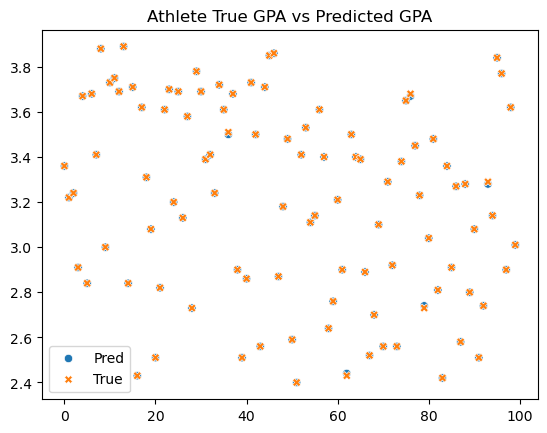

In [415]:
# Model Code
gbr = GradientBoostingRegressor(random_state = 42)
rfr = RandomForestRegressor(random_state = 42)
xr = XGBRegressor(random_state = 42)
x = ath_ml[['Practice_Hours', 'Study_Hours', 'Gender 1', 'Sport 0', 'Sport 1', 'Sport 2', 'Sport 3', 'Sport 4', 'Sport 5', 'Sport 6', 'Sport 7', 
            'Major 1', 'Major 2', 'Major 3', 'Major 4', 'Major 5', 'Major 6', 'Study_Location 1', 'Study_Location 2', 'Study_Location 3', 'Study_Method 1', 'Study_Method 2']]
y = ath_ml['GPA']
xr.fit(x, y)
y_pred = xr.predict(x).round(2)
y_true = y
print(f'Model Score: {xr.score(x, y)}')
plt.title('Athlete True GPA vs Predicted GPA')

# Chart Code
scatterplot = pd.DataFrame()
scatterplot['Pred'] = y_pred
scatterplot['True'] = y_true
sns.scatterplot(scatterplot)

# Correct Counter code
Correct = 0
pred = []
true = []
for x in scatterplot['Pred']:
    x = round(x, 2)
    pred.append(x)
for y in scatterplot['True']:
    true.append(y)
i = 0
while i < len(pred):
    if pred[i] == true[i]:
        Correct += 1
    i += 1
print(f"Model guessed {Correct} out of {len(pred)} Athlete GPA's correctly!")

Model Score: 0.9566767759039102
Model guessed 93 out of 100 Non-Athlete GPA's correctly!


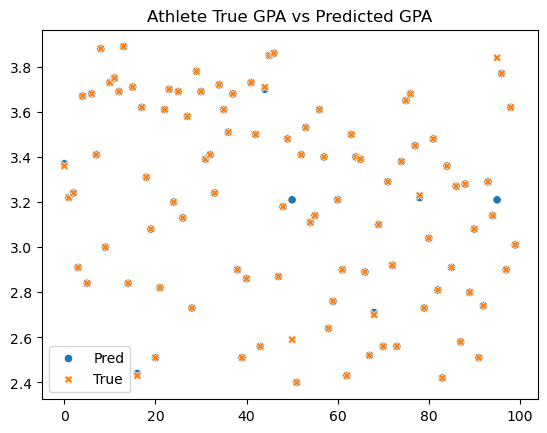

In [423]:
# Model Code
gbr = GradientBoostingRegressor(random_state = 42)
rfr = RandomForestRegressor(random_state = 42)
xr = XGBRegressor(random_state = 42)
x = non_ath_ml[['Study_Hours', 'Gender 1', 'Major 1', 'Major 2', 'Major 3', 'Major 4', 'Major 5', 
                'Major 6', 'Study_Location 1', 'Study_Location 2', 'Study_Location 3', 'Study_Method 1', 'Study_Method 2']]
y = non_ath_ml['GPA']
xr.fit(x, y)
y_pred = xr.predict(x).round(2)
y_true = y
print(f'Model Score: {xr.score(x, y)}')

# Chart Code
scatterplot = pd.DataFrame()
scatterplot['Pred'] = y_pred
scatterplot['True'] = y_true
sns.scatterplot(scatterplot)
plt.title('Athlete True GPA vs Predicted GPA')

# Correct Counter code
Correct = 0
pred = []
true = []
for x in scatterplot['Pred']:
    x = round(x, 2)
    pred.append(x)
for y in scatterplot['True']:
    true.append(y)
i = 0
while i < len(pred):
    if pred[i] == true[i]:
        Correct += 1
    i += 1
print(f"Model guessed {Correct} out of {len(pred)} Non-Athlete GPA's correctly!")

In [359]:
ath_le = athlete[['Gender', 'Sport', 'Major', 'Practice_Hours', 'Study_Hours', 
                 'Study_Location', 'Study_Method', 'Athlete_Negatively_Effects_Academics']]

athlete['GPA'].mean().round(2)
athlete_gpa = []

for x in athlete['GPA']:
    if x < athlete['GPA'].mean().round(2): #mean
        x = 'low'
        athlete_gpa.append(x)
    else:
        x = 'high'
        athlete_gpa.append(x)
ath_le['GPA'] = athlete_gpa

le = LabelEncoder()
for x in ath_le.columns[0:9]:
    ath_le[x] = le.fit_transform(ath_le[x])
ath_le

C:\Users\heath\AppData\Local\Temp\ipykernel_4292\3147273065.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath_le['GPA'] = athlete_gpa
C:\Users\heath\AppData\Local\Temp\ipykernel_4292\3147273065.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath_le[x] = le.fit_transform(ath_le[x])
C:\Users\heath\AppData\Local\Temp\ipykernel_4292\3147273065.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,Gender,Sport,Major,Practice_Hours,Study_Hours,Study_Location,Study_Method,Athlete_Negatively_Effects_Academics,GPA
0,1,0,0,3,2,3,2,0,0
1,0,2,1,1,3,2,2,0,0
2,0,6,5,9,4,3,0,0,0
3,1,6,4,5,1,3,1,1,1
4,0,2,3,7,8,3,1,1,0
...,...,...,...,...,...,...,...,...,...
95,1,0,2,0,2,1,2,0,0
96,1,4,3,13,7,3,1,0,0
97,1,1,6,6,7,0,2,0,1
98,1,7,1,5,4,0,0,0,0


Model Score: 1.0


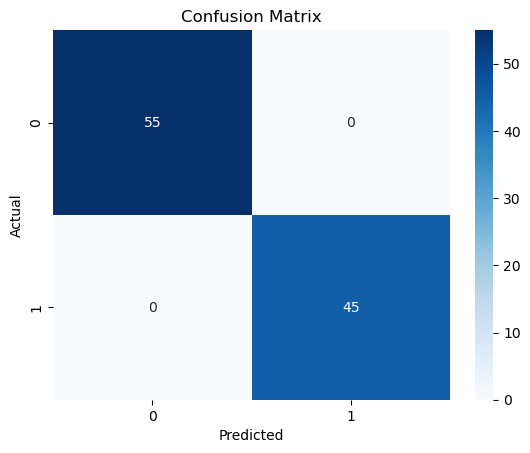

In [427]:
gbc = GradientBoostingClassifier(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
xc= XGBClassifier(random_state = 42)
x = ath_le[['Gender', 'Sport', 'Major', 'Practice_Hours', 'Study_Hours', 
                 'Study_Location', 'Study_Method', 'Athlete_Negatively_Effects_Academics']]
y = ath_le['GPA']

xc.fit(x, y)
y_pred = xc.predict(x)
y_true = y
print(f'Model Score: {xc.score(x, y)}')
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [362]:
non_ath_le = non_athlete[['Gender', 'Major', 'Study_Hours', 
                 'Study_Location', 'Study_Method', 'NonAthlete_Negatively_Impacts']]

non_athlete['GPA'].mean().round(2)
non_athlete_gpa = []

for x in non_athlete['GPA']:
    if x < non_athlete['GPA'].mean().round(2): #mean
        x = 'low'
        non_athlete_gpa.append(x)
    else:
        x = 'high'
        non_athlete_gpa.append(x)
non_ath_le['GPA'] = non_athlete_gpa

le = LabelEncoder()
for x in non_ath_le.columns[0:9]:
    non_ath_le[x] = le.fit_transform(non_ath_le[x])
non_ath_le

C:\Users\heath\AppData\Local\Temp\ipykernel_4292\4184200414.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_ath_le['GPA'] = non_athlete_gpa
C:\Users\heath\AppData\Local\Temp\ipykernel_4292\4184200414.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_ath_le[x] = le.fit_transform(non_ath_le[x])
C:\Users\heath\AppData\Local\Temp\ipykernel_4292\4184200414.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Gender,Major,Study_Hours,Study_Location,Study_Method,NonAthlete_Negatively_Impacts,GPA
0,1,0,4,2,1,0,0
1,1,1,9,2,2,0,0
2,0,1,3,3,1,0,0
3,1,5,4,0,1,0,0
4,1,5,8,2,1,0,0
...,...,...,...,...,...,...,...
95,1,4,9,2,1,1,0
96,0,2,1,3,1,1,1
97,0,2,2,1,0,0,1
98,0,6,0,1,0,0,1


Model Score: 0.99


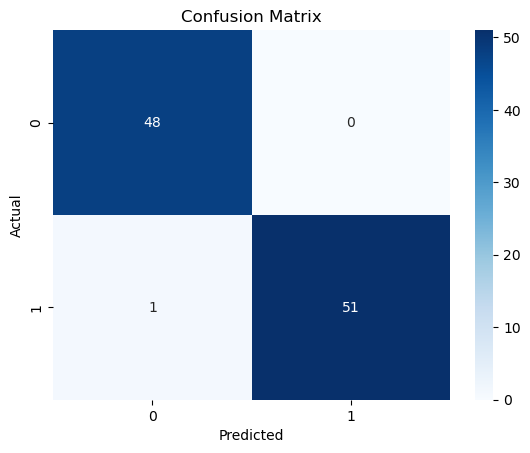

In [364]:
x = non_ath_le[['Gender', 'Major', 'Study_Hours', 
                 'Study_Location', 'Study_Method', 'NonAthlete_Negatively_Impacts']]
y = non_ath_le['GPA']

xc.fit(x, y)
y_pred = xc.predict(x)
y_true = y
print(f'Model Score: {xc.score(x, y)}')
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [366]:
xc = XGBClassifier(random_state = 42)
y = ath_le['GPA']
for x in ath_le[['Gender', 'Sport', 'Major', 'Practice_Hours', 'Study_Hours', 'Study_Location', 'Study_Method', 'Athlete_Negatively_Effects_Academics']]:
    xc.fit(ath_le[x], y)
    print(f'{x}: {xc.score(ath_le[x], y)}\n\n')

Gender: 0.55


Sport: 0.62


Major: 0.59


Practice_Hours: 0.62


Study_Hours: 0.59


Study_Location: 0.55


Study_Method: 0.6


Athlete_Negatively_Effects_Academics: 0.55


